#  Constructing Temporal Networks with AD Model

In [8]:
# -*- coding: utf-8 -*-
import random
import networkx as nx
import numpy as np
import json
import time

# ----------start to count time-------------------
beginTime = time.clock()

# Inverse Transform Method
# more efficient
def powerlaw_num(v,xmin=0.01):
    x = random.random()
    return (xmin**(1-v)-(xmin**(1-v)-1)*x)**(1./(1-v))

# Generating an empty graph
def emptyGraph(N):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    return G

# Generating activity driven time-varying network in one timeslot
def init_activityDriven(N=1000, m=4):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    """
    # initiate parameters
    # N = 1000  # nodes
    # m = 6     # rewiring links
    dt = 1      # active slot
    eta = 10    # rescaling factor , ai = eta * xi

    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        xi = powerlaw_num(3, 0.03)  # node's activated prob belongs to F(x)=x**(-3)
        if random.random() <= eta * xi * dt:
            for mi in range(m):
                j = random.choice(range(N))
                while j == i or G.has_edge(i, j):
                    j = random.choice(range(N))
                G.add_edge(i, j)
    return G  # return a graph object

# Generating T time steps time-varying activity driven networks
def temporal_activityDriven(N=1000, m=4, T=10):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    T :   time slots
    """
    tG = {}
    for i in range(1, T+1):
        G_temp = init_activityDriven(N, m)
        print "network %s density is:"%i,nx.density(G_temp)
        print "is connected:",nx.is_connected(G_temp)
        tempNet = nx.to_dict_of_dicts(G_temp)
        tG[i] = tempNet
    return tG  # return a dict-like time-varying graph

#*******************************************************************#
# main process to construct time-varing networks

# initiate network parameters
N = 100
m = 4
T = 10

networkPath = "F:\\TemporalKatz\\AD_N_%s_m_%s_T_%s.json"%(N, m, T)
tNet = temporal_activityDriven(N, m, T) 

with open(networkPath, 'w') as netFile:
    netFile.write(json.dumps(tNet))
print "AD temporal networks have been constructed!"
netFile.close()

# ------------counting running time-----------------
endTime = time.clock()
print "Running time: %s Seconds(%s Minutes, %s Hours)" % (
    endTime - beginTime, (endTime - beginTime) / 60, (endTime - beginTime) / 3600)      

network 1 density is: 0.0379797979798
is connected: False
network 2 density is: 0.039595959596
is connected: False
network 3 density is: 0.0492929292929
is connected: False
network 4 density is: 0.0379797979798
is connected: False
network 5 density is: 0.0436363636364
is connected: False
network 6 density is: 0.0379797979798
is connected: False
network 7 density is: 0.040404040404
is connected: False
network 8 density is: 0.0371717171717
is connected: False
network 9 density is: 0.0347474747475
is connected: False
network 10 density is: 0.040404040404
is connected: False
AD temporal networks have been constructed!
Running time: 0.0481388313658 Seconds(0.000802313856097 Minutes, 1.33718976016e-05 Hours)


# Constructing Temporal Networks with ER Model

In [7]:
# -*- coding: utf-8 -*-
import random
import networkx as nx
import numpy as np
import json
import time

# ----------start to count time-------------------
beginTime = time.clock()

def temporal_ER(N=100, p=0.1, T=10):
    """"
    Parameters
    ----------
    N :   nodes
    p :   links probability
    T :   time slots
    """
    tG = {}
    for i in range(1, T+1):
        G_temp = nx.fast_gnp_random_graph(N, p)
        print "network %s density is:"%i,nx.density(G_temp)
        print "is connected:",nx.is_connected(G_temp)
        tempNet = nx.to_dict_of_dicts(G_temp)
        tG[i] =tempNet
    return tG  # return a dict-like time-varing graph

#*******************************************************************#
# main process to construct time-varing networks

# initiate network parameters
N = 100
p = 0.1
T = 10

networkPath = "F:\\TemporalKatz\\ER_N_%s_p_%s_T_%s.json"%(N, p, T)
tNet = temporal_ER(N, p, T) 

with open(networkPath, 'w') as netFile:
    netFile.write(json.dumps(tNet))
print "ER temporal networks have been constructed!"
netFile.close()

# ------------counting running time-----------------
endTime = time.clock()
print "Running time: %s Seconds(%s Minutes, %s Hours)" % (
    endTime - beginTime, (endTime - beginTime) / 60, (endTime - beginTime) / 3600)  

network 1 density is: 0.1
is connected: True
network 2 density is: 0.103838383838
is connected: True
network 3 density is: 0.0935353535354
is connected: True
network 4 density is: 0.106262626263
is connected: True
network 5 density is: 0.104646464646
is connected: True
network 6 density is: 0.0923232323232
is connected: True
network 7 density is: 0.0965656565657
is connected: True
network 8 density is: 0.0975757575758
is connected: True
network 9 density is: 0.0973737373737
is connected: True
network 10 density is: 0.099797979798
is connected: True
ER temporal networks have been constructed!
Running time: 0.0238071057448 Seconds(0.000396785095747 Minutes, 6.61308492912e-06 Hours)


In [20]:
import math 
import networkx as nx

G = nx.fast_gnp_random_graph(100, 0.1)
print "is connected:",nx.is_connected(G)

phi = 10
centrality_dict = nx.katz_centrality(G, 1/phi-0.01, 1, 1000)
tempList = sorted(centrality_dict.iteritems(), key = lambda getNode:getNode[1], reverse = True)

print "centrality list is:",tempList

for n,c in sorted(centrality_dict.items()):
    print("%d %0.5f"%(n,c))
    

is connected: True
centrality list is: [(37, 0.10598221108877477), (4, 0.1059617938427209), (18, 0.10500078413473758), (53, 0.10499101690143042), (0, 0.10498085021659564), (26, 0.10396295282430791), (31, 0.10391225270619514), (44, 0.10387130456776592), (95, 0.10316599605246576), (62, 0.10307492755508531), (10, 0.10307080772881365), (76, 0.10305587095727191), (69, 0.10302867962222399), (87, 0.1030246518000144), (6, 0.10296708825232961), (45, 0.10296664987261013), (83, 0.10292853151735518), (77, 0.10292776350345956), (20, 0.10292328137751018), (72, 0.10211966321486683), (91, 0.10209662299493544), (12, 0.10209104951273541), (63, 0.10203865116017383), (54, 0.10203144198572286), (41, 0.10203109116447301), (52, 0.10203082535646316), (93, 0.10203049202198149), (89, 0.10202606836569925), (16, 0.10201686847268707), (74, 0.10200295417333184), (17, 0.10198903551792554), (49, 0.10198474739956184), (36, 0.10190168525798757), (51, 0.10190017719507405), (39, 0.10189064112398893), (19, 0.1011758296212

In [44]:
import math 
import networkx as nx
from collections import Counter
phi = 10

# initiate kz
init_kz = dict((n,0) for n in range(50)) 
lastDict = init_kz
for i in range(3):
    tempG = nx.fast_gnp_random_graph(50, 0.1)
    print "is connected:",nx.is_connected(tempG)
    # current centrality
    temp_centrality_dict = nx.katz_centrality(tempG, 1/phi-0.01, 1, 1000)
    # accumulated centrality
    temp_centrality_dict = dict(Counter(lastDict) + Counter(temp_centrality_dict))
    # iteration
    lastDict = temp_centrality_dict
print temp_centrality_dict       
kzList = sorted(temp_centrality_dict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
print kzList

is connected: True
is connected: True
is connected: True
{0: 0.43134910783516156, 1: 0.42702439198901043, 2: 0.4258680202690378, 3: 0.4243504357884439, 4: 0.43132256142508374, 5: 0.4214523891019791, 6: 0.4285134202746599, 7: 0.4228055425149842, 8: 0.42407987121424995, 9: 0.4298370476995911, 10: 0.42564015267098465, 11: 0.41709769301048605, 12: 0.41870335512868095, 13: 0.4272180039711546, 14: 0.42000564679594077, 15: 0.4215334946695919, 16: 0.43268421431536985, 17: 0.4159090498909137, 18: 0.4227367668342751, 19: 0.4117694500074288, 20: 0.4226741484212524, 21: 0.42440810859034506, 22: 0.4299408574837413, 23: 0.42016790094212897, 24: 0.4145864991732016, 25: 0.42582873298059265, 26: 0.4172679453859972, 27: 0.42861977524884826, 28: 0.42447006660054376, 29: 0.4243323592539493, 30: 0.41716690770720205, 31: 0.42009901597312965, 32: 0.4253791225142646, 33: 0.4314536967031568, 34: 0.4270277832840508, 35: 0.42139568382685666, 36: 0.4283825869809483, 37: 0.4285177311123046, 38: 0.4327791872866872,

# temporal ER robustness

is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected: True
is connected

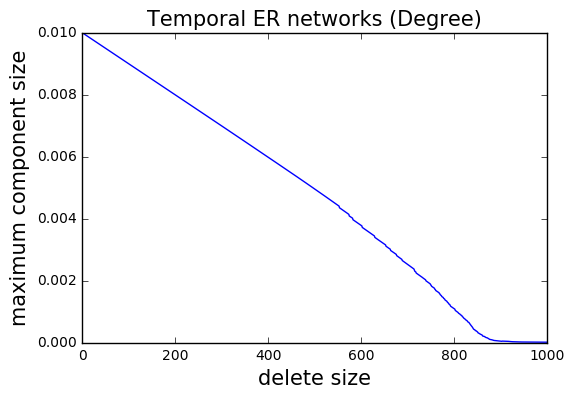

In [81]:
import math 
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

N = 1000
phi = N # the largest eigenvalue

# initiate kz
init_kz = dict((n,0) for n in range(N)) 
lastDict = init_kz
tG = []
for i in range(100):
    tempG = nx.fast_gnp_random_graph(N, 0.01)
    # save ER networks to tG (graph format)
    tG.append(tempG)
    print "is connected:",nx.is_connected(tempG)
    # current centrality
#     temp_centrality_dict = nx.katz_centrality(tempG, 10/phi-0.001, 1, 1000)
    temp_centrality_dict = nx.degree_centrality(tempG)
    # accumulated centrality
    temp_centrality_dict = dict(Counter(lastDict) + Counter(temp_centrality_dict))
    # iteration
    lastDict = temp_centrality_dict
# print temp_centrality_dict       
# sorted all node linked to all networks
kzList = sorted(temp_centrality_dict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
# print kzList

# get the node list
nodeList = []
for j in range(len(kzList)):
    temp = kzList[j][0]
    nodeList.append(temp)
# print nodeList

# use the node list to calculate the maximum connected component  
ratioList = []
deleteSize = 1

for k in range(len(nodeList)/deleteSize-1):
    rList = nodeList[k*deleteSize:(k+1)*deleteSize]
    
    sumRatio = 0
    for ti in range(len(tG)):
        remainG = tG[ti]
        remainG.remove_nodes_from(rList)
        largest_cc = max(nx.connected_components(remainG))
        
        tempRatio = len(largest_cc)/float(len(tG))/len(nodeList)
        sumRatio += tempRatio 
        
    ratioList.append(sumRatio/len(tG))
#     print "done!"
# print ratioList

R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("delete size",fontsize=15)
ax.set_ylabel("maximum component size",fontsize=15)
ax.set_title("Temporal ER networks (Degree)",fontsize=15)

plt.plot(ratioList)  

plt.show()    

# Temporal BA Networks

In [83]:
import math 
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy.linalg

# N = 1000
# phi = N # the largest eigenvalue
# L = nx.normalized_laplacian_matrix(tempG)
# e = numpy.linalg.eigvals(L.A)
# phi = max(e)

# initiate kz
init_kz = dict((n,0) for n in range(N)) 
lastDict = init_kz
tG = []
for i in range(100):
    tempG = nx.barabasi_albert_graph(N, 4)
#     tempG = nx.watts_strogatz_graph(N, 4, 0.1)
    # save ER networks to tG (graph format)
    tG.append(tempG)
    print "is connected:",nx.is_connected(tempG)
    
    L = nx.normalized_laplacian_matrix(tempG)
    e = numpy.linalg.eigvals(L.A)
    phi = max(e) # the largest eigenvalue
    # current centrality
    
    temp_centrality_dict = nx.katz_centrality(tempG, (1/phi)*0.8, 1, 1000)
#     temp_centrality_dict = nx.degree_centrality(tempG)
    # accumulated centrality
    temp_centrality_dict = dict(Counter(lastDict) + Counter(temp_centrality_dict))
    # iteration
    lastDict = temp_centrality_dict
# print temp_centrality_dict       
# sorted all node linked to all networks
kzList = sorted(temp_centrality_dict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
# print kzList

# get the node list
nodeList = []
for j in range(len(kzList)):
    temp = kzList[j][0]
    nodeList.append(temp)
# print nodeList

# use the node list to calculate the maximum connected component  
ratioList = []
deleteSize = 1

for k in range(len(nodeList)/deleteSize-1):
    rList = nodeList[k*deleteSize:(k+1)*deleteSize]
    
    sumRatio = 0
    for ti in range(len(tG)):
        remainG = tG[ti]
        remainG.remove_nodes_from(rList)
        largest_cc = max(nx.connected_components(remainG))
        
        tempRatio = len(largest_cc)/float(len(tG))/len(nodeList)
        sumRatio += tempRatio 
        
    ratioList.append(sumRatio/len(tG))
#     print "done!"
# print ratioList

R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("delete size",fontsize=15)
ax.set_ylabel("maximum component size",fontsize=15)
ax.set_title("Temporal BA networks (Degree)",fontsize=15)

plt.plot(ratioList)  

plt.show()    

is connected: True


D:\Anaconda2\lib\site-packages\networkx\algorithms\centrality\katz.py:179: RuntimeWarning: overflow encountered in double_scalars
  err = sum([abs(x[n]-xlast[n]) for n in x])
D:\Anaconda2\lib\site-packages\networkx\algorithms\centrality\katz.py:174: RuntimeWarning: overflow encountered in double_scalars
  x[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
D:\Anaconda2\lib\site-packages\networkx\algorithms\centrality\katz.py:179: RuntimeWarning: invalid value encountered in double_scalars
  err = sum([abs(x[n]-xlast[n]) for n in x])


NetworkXError: Power iteration failed to converge in 1000 iterations.

# Temporal AD Networks

is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False
is connected: False


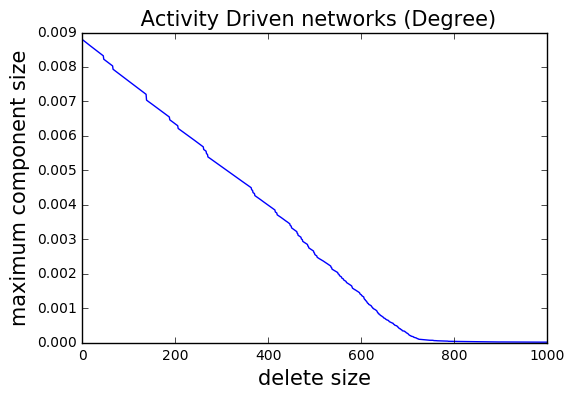

In [77]:
import math 
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

N = 1000
phi = N # the largest eigenvalue

# initiate kz
init_kz = dict((n,0) for n in range(N)) 
lastDict = init_kz
tG = []
for i in range(100):
    tempG = init_activityDriven(N=1000, m=4)
    # save ER networks to tG (graph format)
    tG.append(tempG)
    print "is connected:",nx.is_connected(tempG)
    # current centrality
#     temp_centrality_dict = nx.katz_centrality(tempG, 1/phi-0.0001, 1, 1000)
    temp_centrality_dict = nx.degree_centrality(tempG)
    # accumulated centrality
    temp_centrality_dict = dict(Counter(lastDict) + Counter(temp_centrality_dict))
    # iteration
    lastDict = temp_centrality_dict
# print temp_centrality_dict       
# sorted all node linked to all networks
kzList = sorted(temp_centrality_dict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
# print kzList

# get the node list
nodeList = []
for j in range(len(kzList)):
    temp = kzList[j][0]
    nodeList.append(temp)
# print nodeList

# use the node list to calculate the maximum connected component  
ratioList = []
deleteSize = 1

for k in range(len(nodeList)/deleteSize-1):
    rList = nodeList[k*deleteSize:(k+1)*deleteSize]
    
    sumRatio = 0
    for ti in range(len(tG)):
        remainG = tG[ti]
        remainG.remove_nodes_from(rList)
        largest_cc = max(nx.connected_components(remainG))
        
        tempRatio = len(largest_cc)/float(len(tG))/len(nodeList)
        sumRatio += tempRatio 
        
    ratioList.append(sumRatio/len(tG))
#     print "done!"
# print ratioList

R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("delete size",fontsize=15)
ax.set_ylabel("maximum component size",fontsize=15)
ax.set_title(" Activity Driven networks (Degree)",fontsize=15)

plt.plot(ratioList)  

plt.show()    